In [15]:
%load_ext autoreload
%autoreload 2

from pathlib import Path 
from mira.sources.system_dynamics.vensim import template_model_from_mdl_url
from mira.sources.system_dynamics.stella import template_model_from_stella_model_url
from mira.sources.amr.stockflow import *
from mira.metamodel.ops import stratify

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## We ingest a SIR mdl file from Vensim and create an equivalent MIRA template model.



In [16]:
SIR_URL = "https://raw.githubusercontent.com/SDXorg/test-models/master/samples/SIR/SIR.mdl"
vensim_tm_sir = template_model_from_mdl_url(SIR_URL)

## The SIR mdl file is found in the Vensim example model repo.

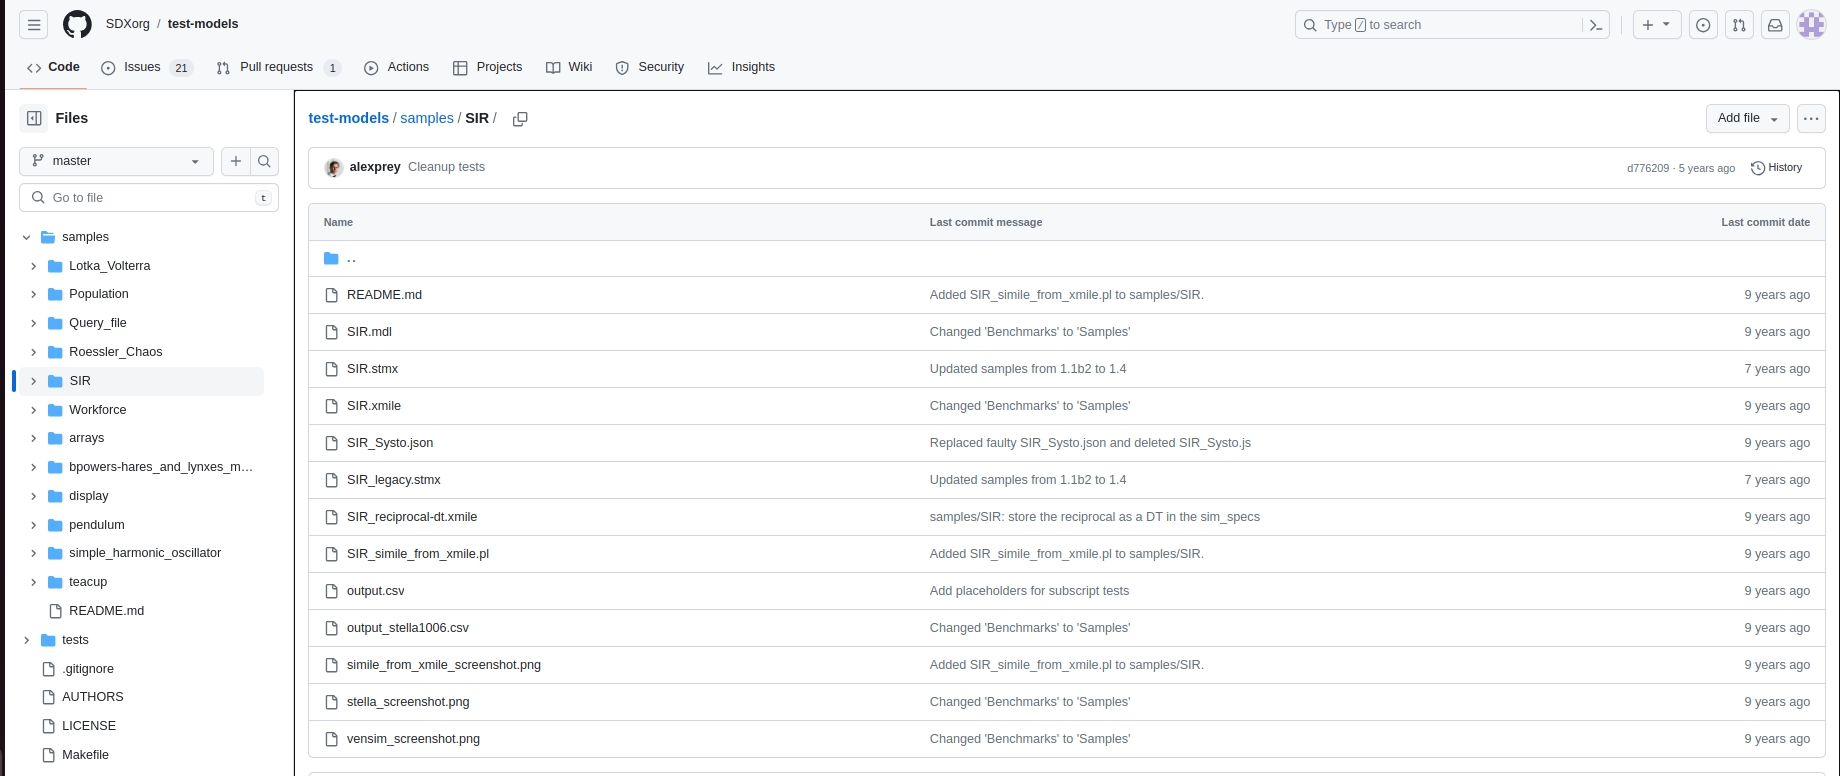

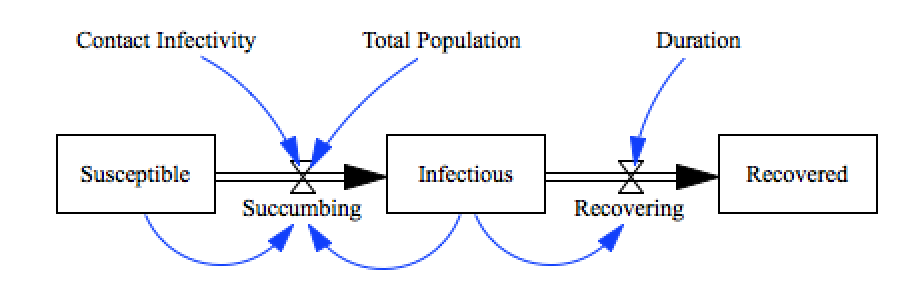


## Define key to stratify on and stratum. We define three different age groups to stratify our template model.

In [18]:
stratification_key = "age"
strata = ['young', 'middle', 'old']

## Parameters of the template model loaded in from a Vensim model.

In [19]:
for param in vensim_tm_sir.parameters.values():
    print("Parameter Name: {} | Value: {}".format(param.name,param.value))

Parameter Name: contact_infectivity | Value: 0.3
Parameter Name: duration | Value: 5.0
Parameter Name: total_population | Value: 1000.0


## Rate-laws of the template model loaded in from a Vensim model.

In [20]:
for template in vensim_tm_sir.templates:
    print("Rate-law: {}".format(template.rate_law))

Rate-law: infectious/duration
Rate-law: contact_infectivity*infectious*susceptible/total_population


## Visualize the template model loaded in from a Vensim model.

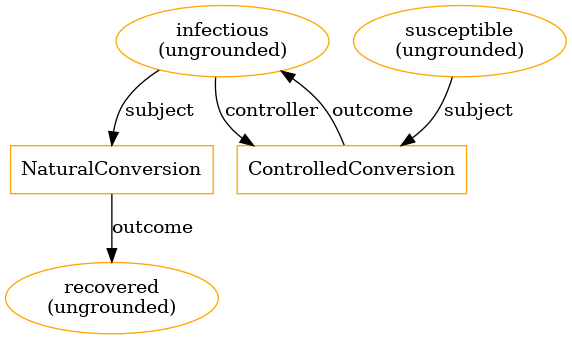

In [21]:
vensim_tm_sir.draw_jupyter()

## Stratify the template model by age and visualize it.

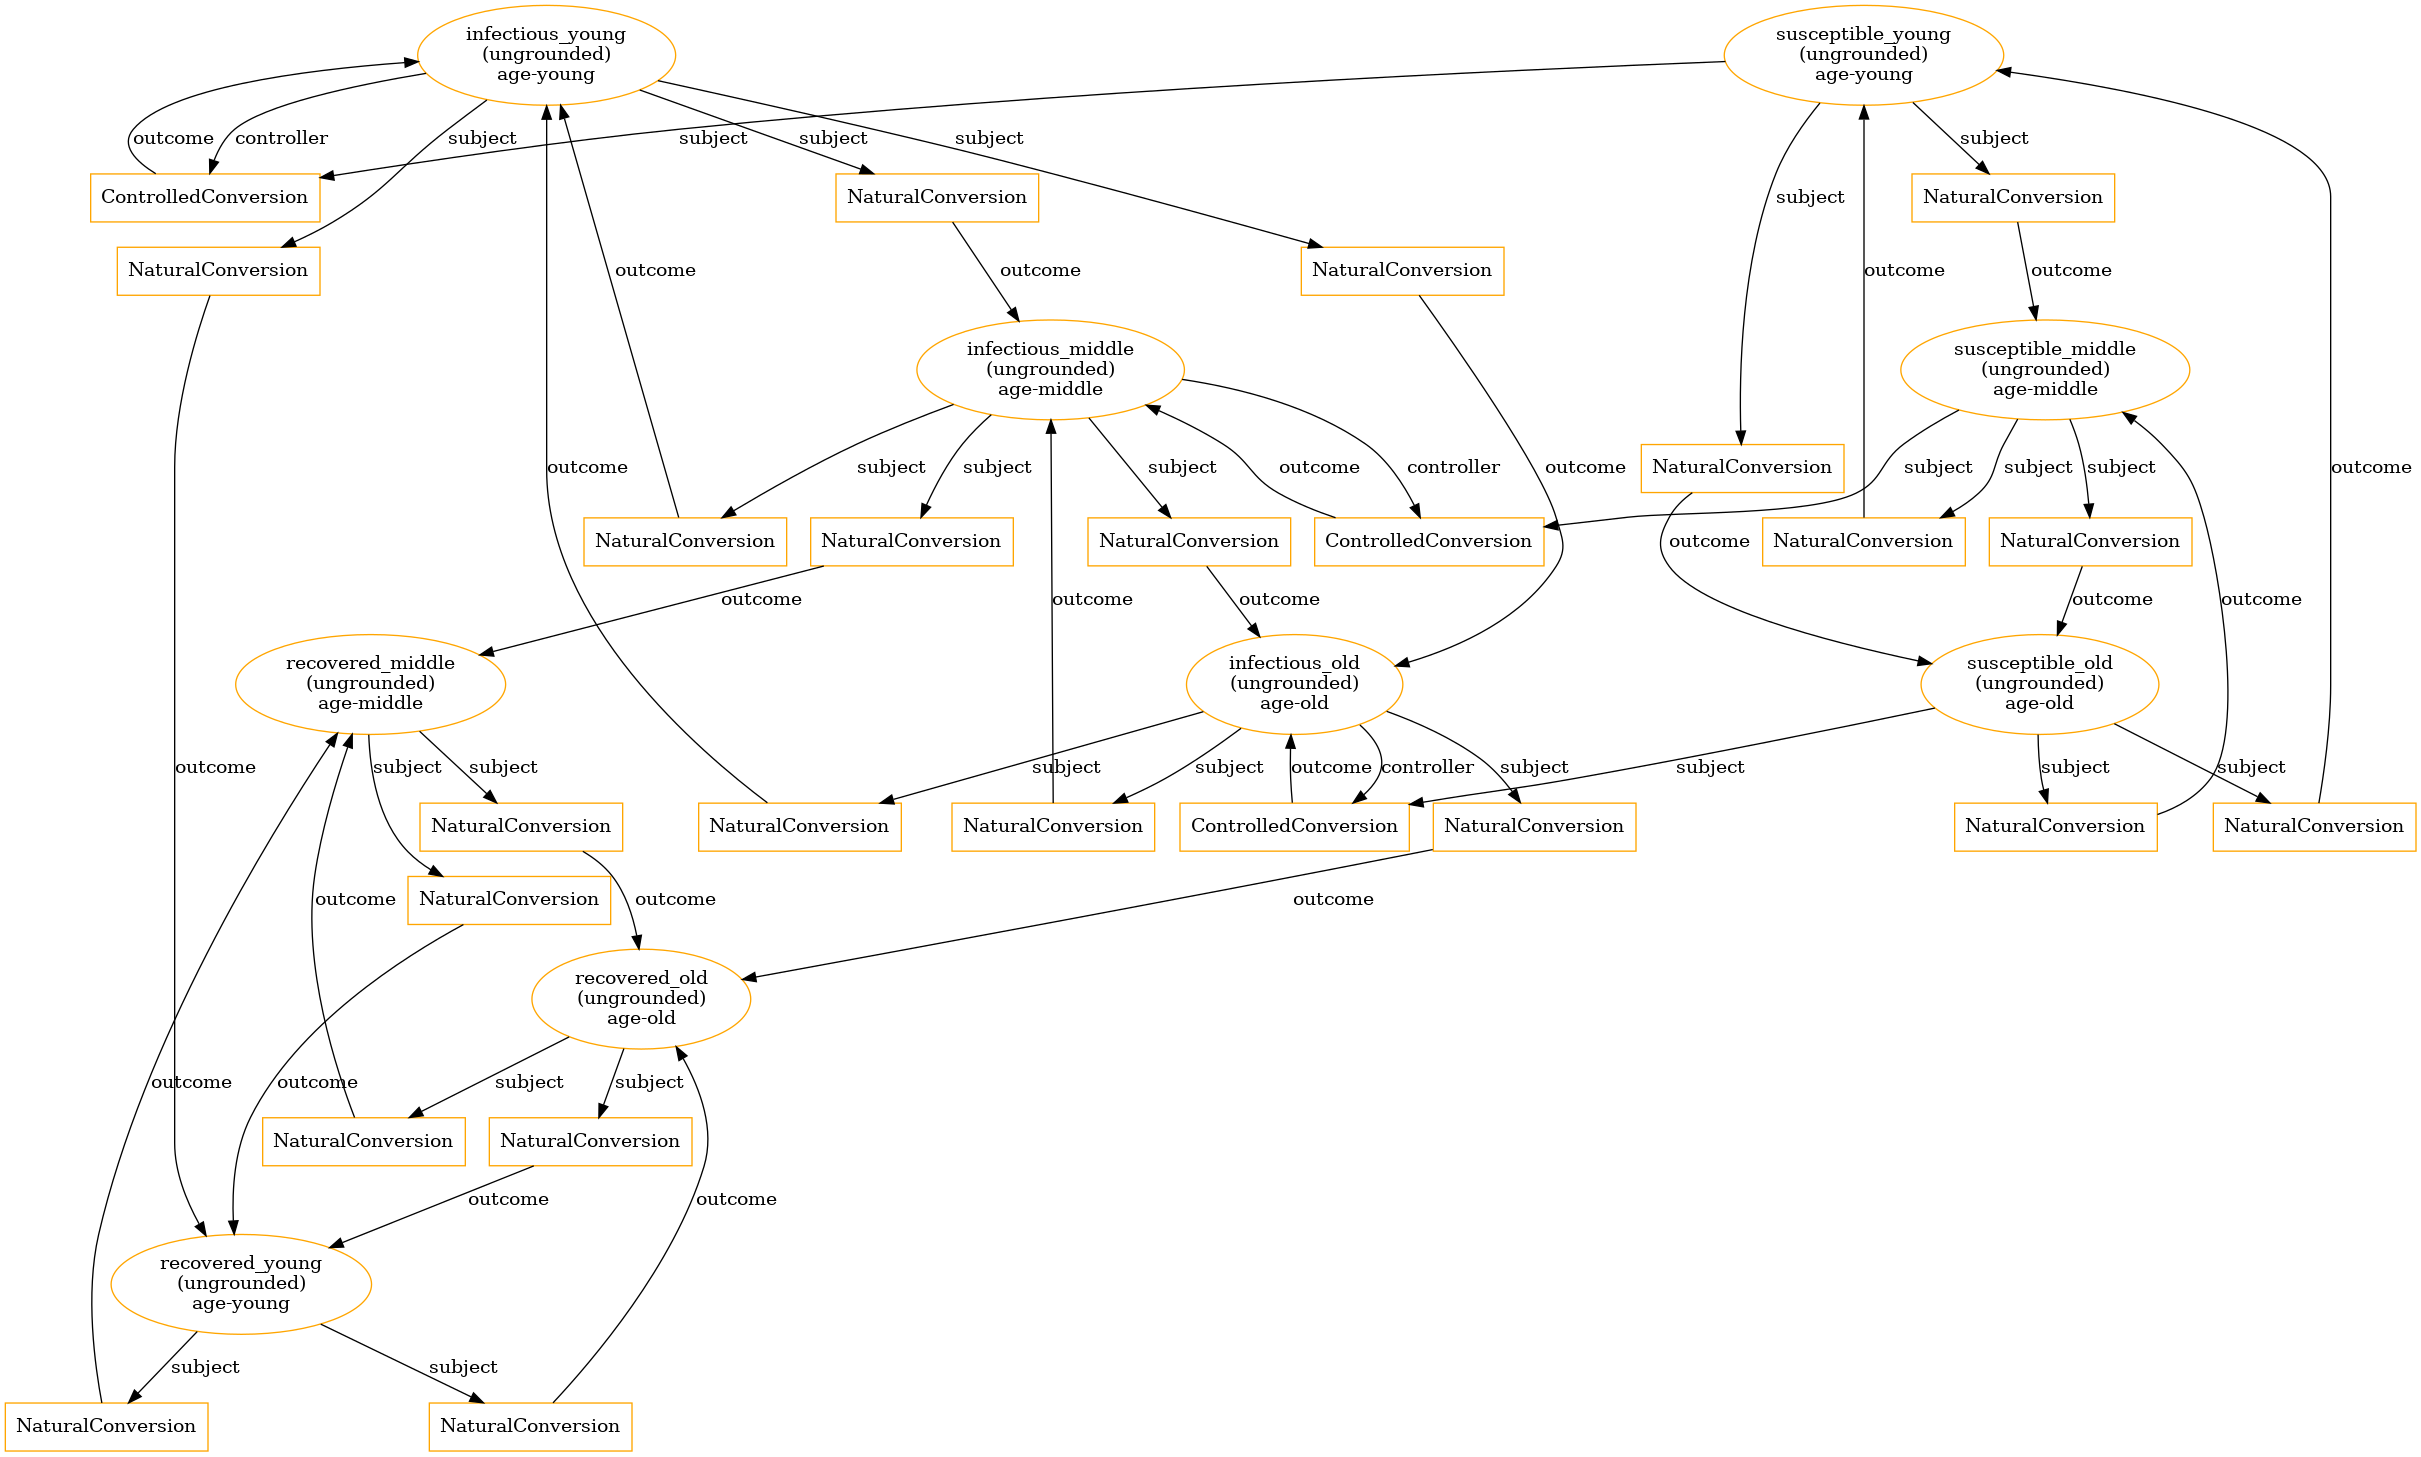

In [22]:
vensim_strat = stratify(vensim_tm_sir,key=stratification_key,strata=strata)
vensim_strat.draw_jupyter()

## Print parameters and rate-laws after the template model has been stratified.

In [8]:
for param in vensim_strat.parameters.values():
    print("Parameter Name: {} | Value: {}".format(param.name,param.value))
print()
for template in vensim_strat.templates:
    print("Rate-law: {}".format(template.rate_law))

Parameter Name: contact_infectivity_0 | Value: 0.3
Parameter Name: contact_infectivity_1 | Value: 0.3
Parameter Name: contact_infectivity_2 | Value: 0.3
Parameter Name: duration_0 | Value: 5.0
Parameter Name: duration_1 | Value: 5.0
Parameter Name: duration_2 | Value: 5.0
Parameter Name: total_population_0 | Value: 1000.0
Parameter Name: total_population_1 | Value: 1000.0
Parameter Name: total_population_2 | Value: 1000.0
Parameter Name: p_middle_old | Value: 0.1
Parameter Name: p_old_middle | Value: 0.1
Parameter Name: p_middle_young | Value: 0.1
Parameter Name: p_young_middle | Value: 0.1
Parameter Name: p_old_young | Value: 0.1
Parameter Name: p_young_old | Value: 0.1

Rate-law: infectious_middle/duration_0
Rate-law: infectious_old/duration_1
Rate-law: infectious_young/duration_2
Rate-law: contact_infectivity_0*infectious_middle*susceptible_middle/total_population_0
Rate-law: contact_infectivity_1*infectious_old*susceptible_old/total_population_1
Rate-law: contact_infectivity_2*infe

## We also ingest a SIR Stella model and create an equivalent MIRA template model
We can only ingest Stella models with the .xmile, .xml, or .stmx extension. The SIR stella model was also retrieved from the same repository that contains sample Vensim models.

In [9]:
XMILE_SIR_URL = "https://raw.githubusercontent.com/SDXorg/test-models/master/samples/SIR/SIR.xmile"
stella_tm_sir  = template_model_from_stella_model_url(XMILE_SIR_URL)

## Parameters of the template model loaded in from a Stella model.

In [10]:
for param in stella_tm_sir.parameters.values():
    print("Parameter Name: {} | Value: {}".format(param.name,param.value))

Parameter Name: total_population | Value: 1000.0
Parameter Name: duration | Value: 5.0
Parameter Name: contact_infectivity | Value: 0.3


## Rate-laws of the template model loaded in from a Stella model.

In [11]:
for template in stella_tm_sir.templates:
    print("Rate-law: {}".format(template.rate_law))

Rate-law: infectious/duration
Rate-law: contact_infectivity*infectious*susceptible/total_population


## Visualize the template model loaded in from a Stella model.

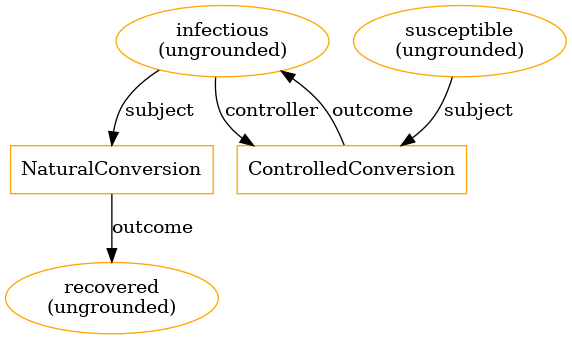

In [12]:
stella_tm_sir.draw_jupyter()

## Stratify the template model by age and visualize it.

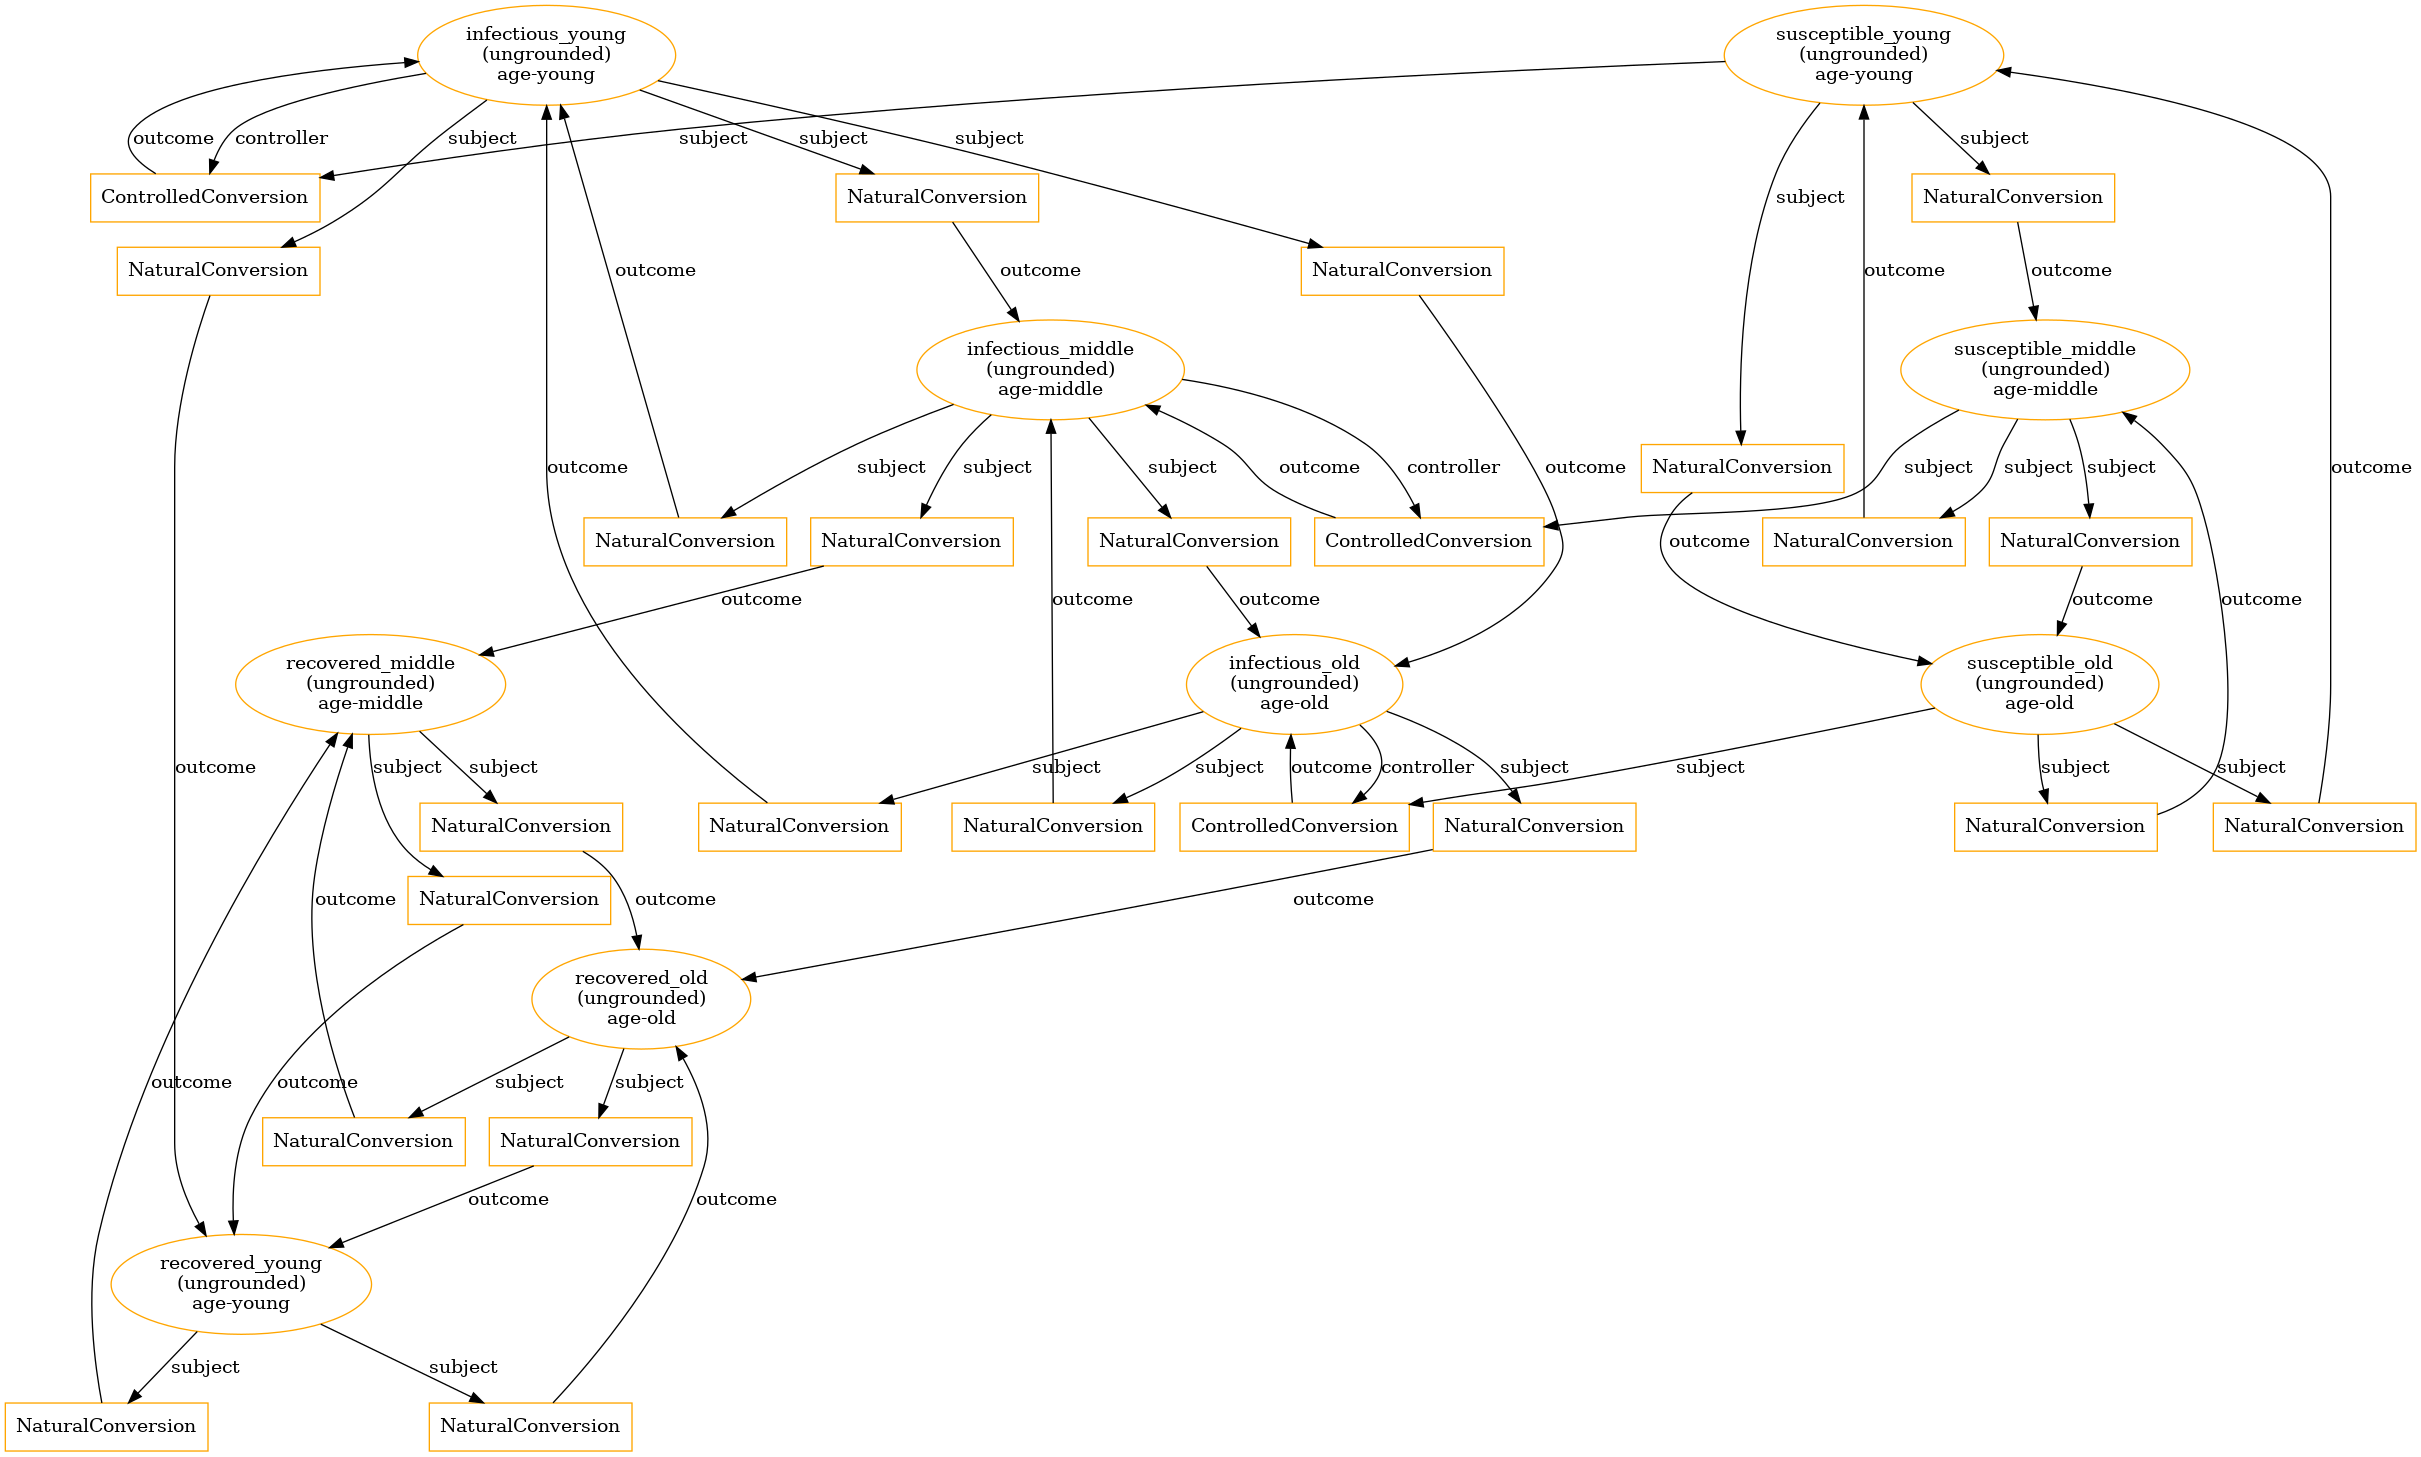

In [13]:
stella_strat = stratify(stella_tm_sir,key=stratification_key,strata=strata)
stella_strat.draw_jupyter()

## Print parameters and rate-laws after the template model has been stratified.

In [14]:
for param in stella_strat.parameters.values():
    print("Parameter Name: {} | Value: {}".format(param.name,param.value))
print()
for template in stella_strat.templates:
    print("Rate-law: {}".format(template.rate_law))

Parameter Name: total_population_0 | Value: 1000.0
Parameter Name: total_population_1 | Value: 1000.0
Parameter Name: total_population_2 | Value: 1000.0
Parameter Name: duration_0 | Value: 5.0
Parameter Name: duration_1 | Value: 5.0
Parameter Name: duration_2 | Value: 5.0
Parameter Name: contact_infectivity_0 | Value: 0.3
Parameter Name: contact_infectivity_1 | Value: 0.3
Parameter Name: contact_infectivity_2 | Value: 0.3
Parameter Name: p_middle_old | Value: 0.1
Parameter Name: p_old_middle | Value: 0.1
Parameter Name: p_middle_young | Value: 0.1
Parameter Name: p_young_middle | Value: 0.1
Parameter Name: p_old_young | Value: 0.1
Parameter Name: p_young_old | Value: 0.1

Rate-law: infectious_middle/duration_0
Rate-law: infectious_old/duration_1
Rate-law: infectious_young/duration_2
Rate-law: contact_infectivity_0*infectious_middle*susceptible_middle/total_population_0
Rate-law: contact_infectivity_1*infectious_old*susceptible_old/total_population_1
Rate-law: contact_infectivity_2*infe